# This script make test data for change point detection

1. Number of change point $\tau$ = 1
1. Length of time series  T = 100
1. Number of change point  N= 1000
1. Number of control data Nc = 1000
1. y = 0 : normal, y=1: anomaly, y = -1 : control


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

# mean = 0 std= 1 ->2

In [2]:
np.random.seed(0)
N = 1000
Nc = 1000
T = 100
times = np.arange(T)
# change point
tau =  np.random.randint(0,T,N)
x = np.zeros((N ,T,1))
y = np.ones((N,T))

for i in range(N):
    x[i,times<tau[i]] =  np.random.randn(tau[i],1)
    x[i,times>=tau[i]] = 2* np.random.randn(T-tau[i],1)
    y[i,times>=tau[i]] = 0
    

xc = np.zeros((Nc,T,1)) 
yc = np.zeros((N,T))
for i in range(Nc):
    xc[i] =  np.random.randn(T,1)
    yc[i] = -1

x = np.r_[x,xc]
y = np.r_[y,yc]

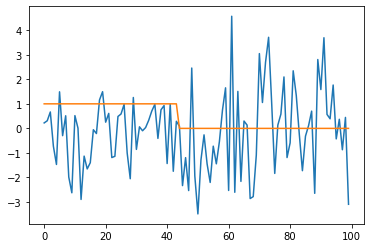

In [3]:
plt.plot(x[0])
plt.plot(y[0])

In [4]:
indecs =  np.arange(N+Nc).reshape(N+Nc,1) * np.ones((1,times.shape[0]))
times_data = np.ones(N+Nc).reshape(N+Nc,1) * times.reshape(1,-1)
data = np.c_[indecs.reshape(-1),times_data.reshape(-1),y.reshape(-1),x.reshape(-1)]
df = pd.DataFrame(data,columns = ['id','time','label','state'])
df.to_csv('../data/toy_std_change_lnt.csv')

# mean = -1 -> 1 std= 1

In [5]:
np.random.seed(0)
N = 1000
Nc = 1000
T = 100
times = np.arange(T)
# change point
tau =  np.random.randint(0,T,N)
x = np.zeros((N ,T,1))
y = np.ones((N,T))

for i in range(N):
    x[i,times<tau[i]] =  -1 +np.random.randn(tau[i],1)
    x[i,times>=tau[i]] = 1 + np.random.randn(T-tau[i],1)
    y[i,times>=tau[i]] = 0
    

xc = np.zeros((Nc,T,1)) 
yc = np.zeros((N,T))
for i in range(Nc):
    xc[i] =  -1 + np.random.randn(T,1)
    yc[i] = -1

x = np.r_[x,xc]
y = np.r_[y,yc]


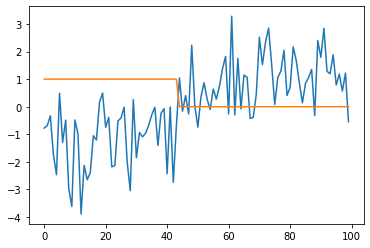

In [6]:
plt.plot(x[0])
plt.plot(y[0])


In [7]:

indecs =  np.arange(N+Nc).reshape(N+Nc,1) * np.ones((1,times.shape[0]))
times_data = np.ones(N+Nc).reshape(N+Nc,1) * times.reshape(1,-1)
data = np.c_[indecs.reshape(-1),times_data.reshape(-1),y.reshape(-1),x.reshape(-1)]
df = pd.DataFrame(data,columns = ['id','time','label','state'])
df.to_csv('../data/toy_mean_change_lnt.csv')

# mean = 0 -> 10 * x/T std= 1

In [8]:
np.random.seed(0)
N = 1000
Nc = 1000
T = 100
times = np.arange(T)
# change point
tau =  np.random.randint(0,T,N)
x = np.zeros((N ,T,1))
y = np.ones((N,T))

for i in range(N):
    x[i,times<tau[i]] =  np.random.randn(tau[i],1)
    x[i,times>=tau[i]] = 10*(times[times>=tau[i]]-  tau[i]).reshape(-1,1)/T + np.random.randn(T-tau[i],1)
    y[i,times>=tau[i]] = 0
    

xc = np.zeros((Nc,T,1)) 
yc = np.zeros((N,T))
for i in range(Nc):
    xc[i] =  np.random.randn(T,1)
    yc[i] = -1

x = np.r_[x,xc]
y = np.r_[y,yc]


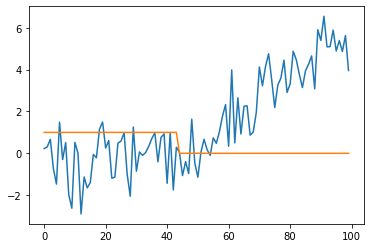

In [9]:
plt.plot(x[0])
plt.plot(y[0])


In [10]:
indecs =  np.arange(N+Nc).reshape(N+Nc,1) * np.ones((1,times.shape[0]))
times_data = np.ones(N+Nc).reshape(N+Nc,1) * times.reshape(1,-1)
data = np.c_[indecs.reshape(-1),times_data.reshape(-1),y.reshape(-1),x.reshape(-1)]
df = pd.DataFrame(data,columns = ['id','time','label','state'])
df.to_csv('../data/toy_linear_change_lnt.csv')

# AR model change
normal :
$$
x[t] = 1.99 * x[t -1]  -  1 x[t-2]+ 0.1w[t]\quad
x[0] = 1, w[t] \sim N(0,1)
$$

Anomaly:
$$
x[t] = 1.9 * x[t -1]  -  1 x[t-2]+ 0.1w[t]\quad
x[0] = 1, w[t] \sim N(0,1)
$$


In [11]:
np.random.seed(0)
N = 1000
Nc = 1000
T = 100
times = np.arange(T)
# change point
tau =  np.random.randint(0,T,N)
x = np.zeros((N ,T,1))
y = np.ones((N,T))

for i in range(N):
    for t in range(T-2):
        if t < tau[i]:
            x[i,t+2] = 1.99*x[i,t+1]   - 1.0 *x[i,t]  + 0.1 *np.random.randn(1)
#             x[i,t+2] = 0.9*x[i,t+1]  + 0.1 *np.random.randn(1)
        else:
            x[i,t+2] = 1.9*x[i,t+1]   - 1.0 *x[i,t]  + 0.1 *np.random.randn(1)
    y[i,times>=tau[i]] = 0
    

xc = np.zeros((Nc,T,1)) 
yc = np.zeros((N,T))
for i in range(Nc):
    for t in range(T-2):
            xc[i,t+2] = 1.99*xc[i,t+1]   - 1.0 *xc[i,t]  + 0.1 *np.random.randn(1)
    yc[i] = -1

x = np.r_[x,xc]
y = np.r_[y,yc]


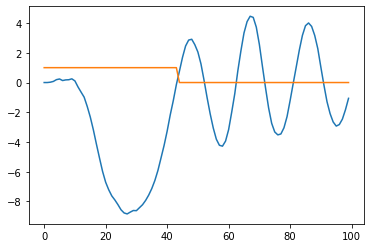

In [12]:
plt.plot(x[0])
plt.plot(y[0])


In [13]:
indecs =  np.arange(N+Nc).reshape(N+Nc,1) * np.ones((1,times.shape[0]))
times_data = np.ones(N+Nc).reshape(N+Nc,1) * times.reshape(1,-1)
data = np.c_[indecs.reshape(-1),times_data.reshape(-1),y.reshape(-1),x.reshape(-1)]
df = pd.DataFrame(data,columns = ['id','time','label','state'])
df.to_csv('../data/toy_ARmodel_change_lnt.csv')

# Spase distribution change
normal :
$$
x \sim N(0,\Lambda_a^{-1}),\quad \Lambda = [[1,0,0][0,1,0][0,0,1]]
$$

Anomaly:
$$
x \sim N(0,\Lambda_a^{-1}),\quad \Lambda = [[1,0,0.5][0,1,0][0.5,0,1]]
$$



In [14]:
np.random.seed(0)
N = 1000
Nc = 1000
T = 100
times = np.arange(T)
# change point
tau =  np.random.randint(0,T,N)
x = np.zeros((N ,T,3))
y = np.ones((N,T))


An = np.array([[1,0,0],[0,1,0],[0,0,1]])
Aa = np.array([[1,0,0.5],[0,1,0],[0.5,0,1]])


for i in range(N):
    x[i,times<tau[i]] =  np.random.multivariate_normal(np.zeros(3),np.linalg.inv(An),size = tau[i])
    x[i,times>=tau[i]] = np.random.multivariate_normal(np.zeros(3),np.linalg.inv(Aa),size = T - tau[i])
    y[i,times>=tau[i]] = 0
    

xc = np.zeros((Nc,T,3)) 
yc = np.zeros((N,T))
for i in range(Nc):
    xc[i] =  np.random.multivariate_normal(np.zeros(3),np.linalg.inv(An),size = T)
    yc[i] = -1

x = np.r_[x,xc]
y = np.r_[y,yc]


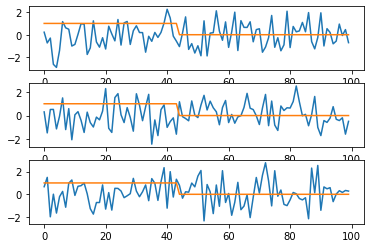

In [15]:
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.plot(x[0,:,i])
    plt.plot(y[0])


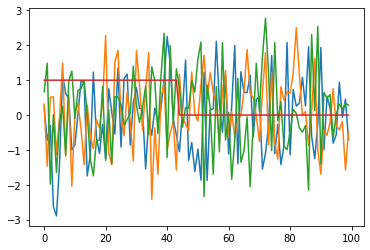

In [16]:
plt.plot(x[0,:])
plt.plot(y[0])



In [17]:
indecs =  np.arange(N+Nc).reshape(N+Nc,1) * np.ones((1,times.shape[0]))
times_data = np.ones(N+Nc).reshape(N+Nc,1) * times.reshape(1,-1)
data = np.c_[indecs.reshape(-1),times_data.reshape(-1),y.reshape(-1),x.reshape(-1,3)]
df = pd.DataFrame(data,columns = ['id','time','label'] + [f'state{i}' for i in range(3)])
df.to_csv('../data/toy_structure_change_lnt.csv')